In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# from itertools import starmap
from utils import save_model, save_plots
from CNN_execution import find_numpy_files, ect_train_validate, report_trained_model

In [7]:
# Parameters required to define the model. 
# Will remain same throught the excerise.
 
NUM_EPOCHS = 50 # number of epochs to train the network for; type=int
LEARNING_RATE = 1e-3 # learning rate for training; type=float
# loss function
lossfcn = nn.CrossEntropyLoss()

# device
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
# timeit.timeit(
#     '''
# trained_outputs = ect_train_validate(
#         10,10,'example_data/outline_input',log_level='None'
#     )
#     ''',
#     setup='from __main__ import ect_train_validate',
#     number=1
# )
num_dirs = 5
num_thresh = 5

classes = [
    i
        for i in os.listdir('data')
        if os.path.isdir(os.path.join('data', i))
]
class_items = {
    i: find_numpy_files(os.path.join('data', i))
        for i in classes
}

# print( "\n".join( [ f'{i}: {len(j)}' for i,j in class_items.items() ] ) )
# Select random 30 files for each classes, to make it run on my computer.
# You can remove this line to run on all files.
class_items = {
    i: np.random.choice(j, 30, replace=False)
        for i, j in class_items.items()
}
try:
    for i in find_numpy_files('example_data/outputs'):
        os.remove(i)
    os.remove('example_data/outputs/.ect_settings')
    for i in class_items:
        os.removedirs(os.path.join('example_data/outputs', i))
    
except FileNotFoundError:
    pass
print( "\n".join( [ f'{i}: {len(j)}' for i,j in class_items.items() ] ) )

Alstroemeria: 30
Apple: 30
Arabidopsis: 30
Brassica: 30
Coleus: 30
Cotton: 30
Grape: 30
Grass: 30
Ivy: 30
Leafsnap: 30
Passiflora: 30
Pepper: 30
Potato: 30
Tomato_: 30
Transect: 30
Viburnum: 30


In [9]:

trained_outputs = ect_train_validate(
    num_dirs=num_dirs,
    num_thresh=num_thresh,
    input_path=class_items,
    output_path='example_data/outputs',
    log_level='INFO'
)

# ThreadPool => 2 minutes 8.5 seconds vs 1 minute 7.5 seconds without ThreadPool.

['Alstroemeria', 'Apple', 'Arabidopsis', 'Brassica', 'Coleus', 'Cotton', 'Grape', 'Grass', 'Ivy', 'Leafsnap', 'Passiflora', 'Pepper', 'Potato', 'Tomato_', 'Transect', 'Viburnum']
num_classes= 16
ECT data; using only normalize, rotation transforms on training data
[INFO]: Epoch 1 of 50
Training
Validation
Training loss: 7.197, training acc: 6.771
Validation loss: 2.781, validation acc: 4.167

Best validation loss: 2.781006246805191

Saving best model for epoch: 1

--------------------------------------------------
[INFO]: Epoch 2 of 50
Training
Validation
Training loss: 2.784, training acc: 8.073
Validation loss: 2.792, validation acc: 4.167
--------------------------------------------------
[INFO]: Epoch 3 of 50
Training
Validation
Training loss: 2.771, training acc: 7.031
Validation loss: 2.775, validation acc: 5.208

Best validation loss: 2.7754741311073303

Saving best model for epoch: 3

--------------------------------------------------
[INFO]: Epoch 4 of 50
Training
Validation
Tr

In [10]:

save_model(
    trained_outputs["num_epochs"],
    trained_outputs["model"],
    trained_outputs["optimizer"],
    trained_outputs["lossfcn"]
)


Saving final model...


(<Figure size 1000x700 with 1 Axes>, <Figure size 1000x700 with 1 Axes>)

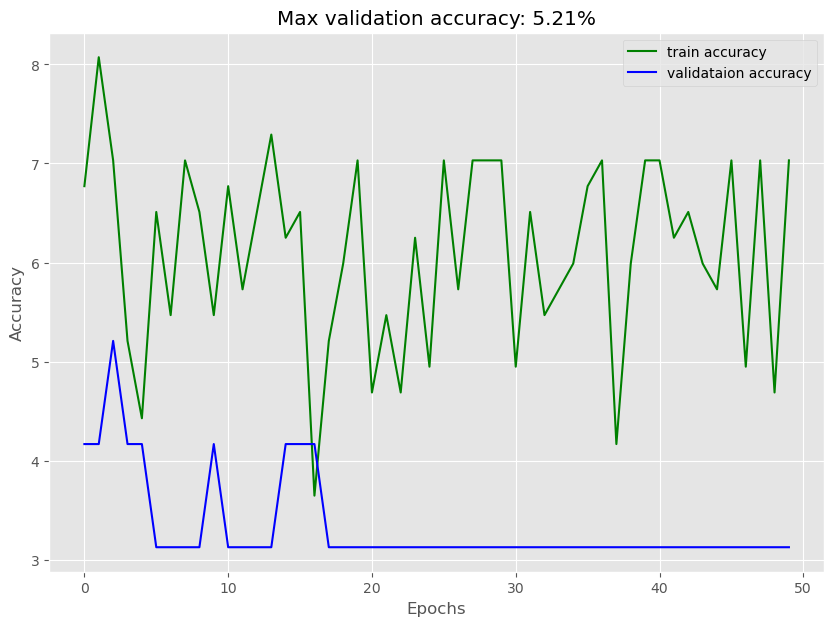

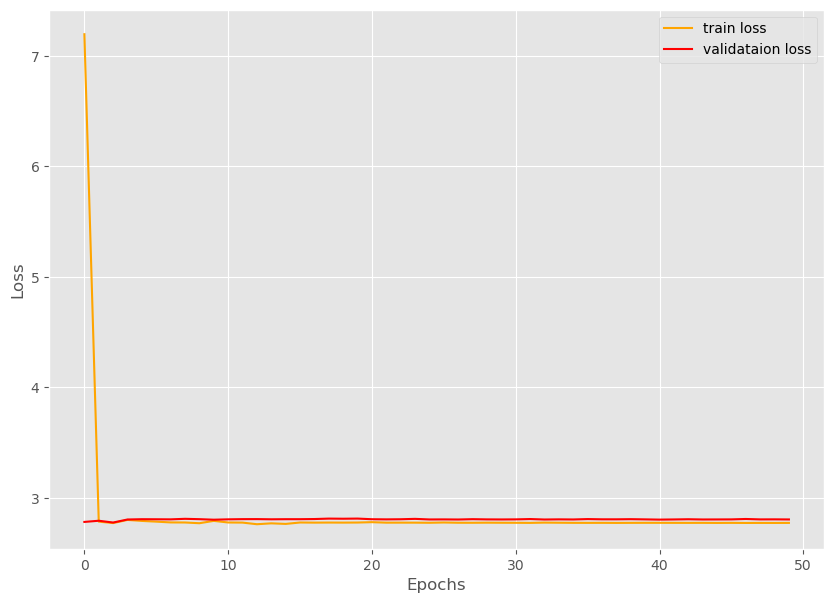

In [11]:

save_plots(
    
    trained_outputs["train_acc"],
    trained_outputs["valid_acc"],
    trained_outputs["train_loss"],
    trained_outputs["valid_loss"],
)


c:\Users\manki\OneDrive - Michigan State University\ECT-Dan Chitwood\ECT-Leaf-CNN\leaf-example-tutorial\CNN_execution.py:216: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  m

CNN(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=20, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=16, bias=True)
)
Using validation to compute confusion matrix


100%|██████████| 24/24 [00:00<00:00, 267.78it/s]

classes: ['Alstroemeria', 'Apple', 'Arabidopsis', 'Brassica', 'Coleus', 'Cotton', 'Grape', 'Grass', 'Ivy', 'Leafsnap', 'Passiflora', 'Pepper', 'Potato', 'Tomato_', 'Transect', 'Viburnum']



c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\manki\miniconda3\envs\pytorch\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

Test Result:
Accuracy Score: 4.17%
_______________________________________________
CLASSIFICATION REPORT:
             0    1    2    3  ...   15  accuracy  macro avg  weighted avg
precision  0.0  0.0  0.0  0.0  ...  0.0  0.041667   0.002604      0.001736
recall     0.0  0.0  0.0  0.0  ...  0.0  0.041667   0.062500      0.041667
f1-score   0.0  0.0  0.0  0.0  ...  0.0  0.041667   0.005000      0.003333
support    5.0  9.0  5.0  7.0  ...  5.0  0.041667  96.000000     96.000000

[4 rows x 19 columns]
_______________________________________________
Confusion Matrix: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0  0  0 

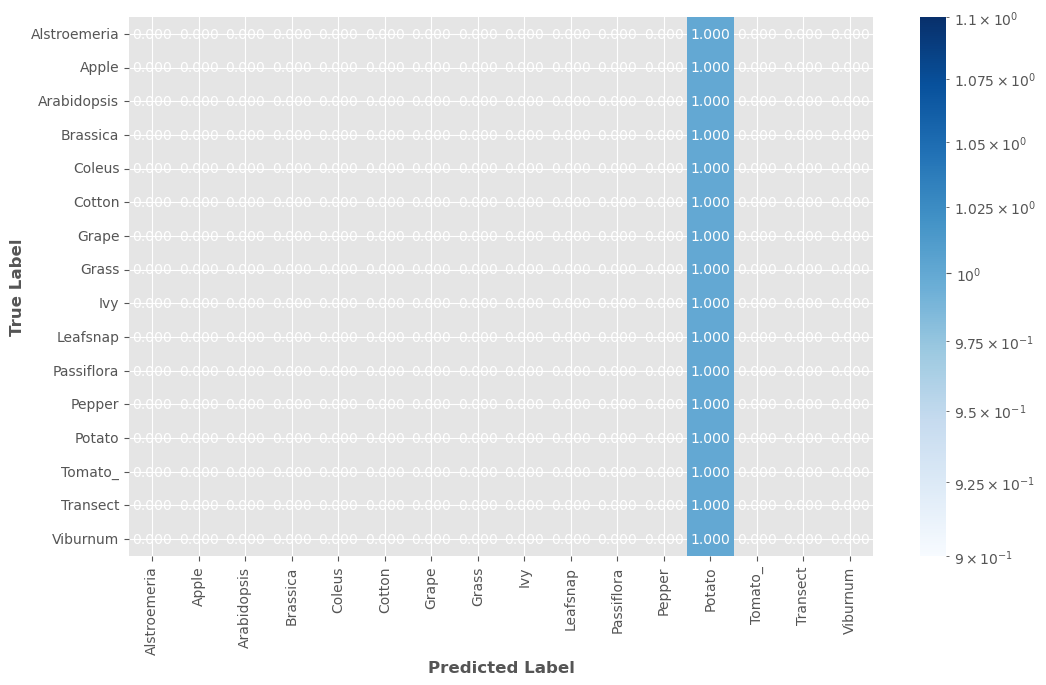

In [12]:

report_trained_model(
    num_dirs, num_thresh,
    trained_outputs["train_dataset"],
    trained_outputs["train_loader"],
    trained_outputs["test_loader"],
    trained_outputs["test_dataset"]
)

Using validation to compute ROC curve


100%|██████████| 24/24 [00:01<00:00, 16.84it/s]


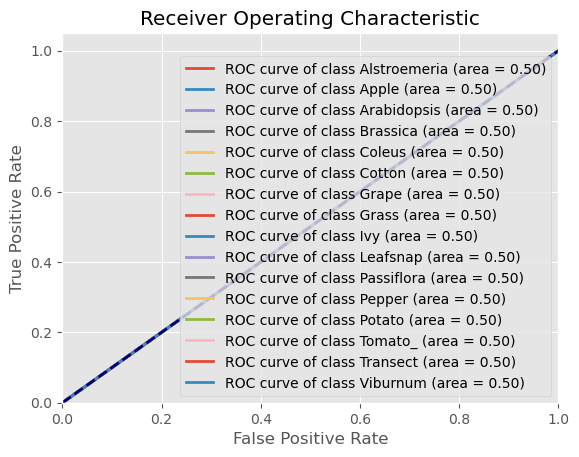

In [17]:
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
model = trained_outputs["model"]
model.eval()
model = model.to(device)
print('Using validation to compute ROC curve')
valid_running_pred = []
valid_running_labels = []
counter = 0
with torch.no_grad():
    for i, data in tqdm(enumerate(trained_outputs["test_loader"]), total=len(trained_outputs["test_loader"])):
        counter += 1
        
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        # forward pass
        outputs = model(image)
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)

        valid_running_pred.append(outputs)
        valid_running_labels.append(labels)

# confusion matrix for the complete epoch
valid_running_pred = torch.cat(valid_running_pred)
valid_running_labels = torch.cat(valid_running_labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(trained_outputs["test_dataset"].classes)):
    fpr[i], tpr[i], _ = roc_curve(valid_running_labels.cpu().numpy() == i, valid_running_pred.cpu().numpy()[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(len(trained_outputs["test_dataset"].classes)):
    plt.plot(fpr[i], tpr[i],
             lw=lw, label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(trained_outputs["test_dataset"].classes[i], roc_auc[i]))
    
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The following python code will extract the data from the zip files in the data folder and put them in the appropriate folders. The code will create a folder for each class and extract all the class member zip files into that folder. The code will also handle the case where the class member zip files are named with a prefix of the class name.

```python

toplevel = [i for i in os.listdir('data') if not ( i.startswith('.') or i.startswith('2') ) and os.path.isfile(os.path.join('data',i)) ]
classes = {}
for i in toplevel:
    added = False
    i = i[:-4] # Remove the .zip
    for j in toplevel:
        if i == j[:-4]:
            continue
        common = os.path.commonprefix([i,j])
        if len(common) > 5:
            added = True
            classes[common] = classes.get(common,[]) + [j]
    if not added:
        classes[i] = classes.get(i,[]) + [i+'.zip']
[os.makedirs(os.path.join('data',i), exist_ok=True) for i in classes]

import zipfile as zp

for folder, zipfiles in classes.items():
    for z in zipfiles:
        with zp.ZipFile(os.path.join('data',z), 'r') as f:
            names = f.namelist()
            for name in names:
                if name.endswith('.npy'):
                    f.extract(name, os.path.join('data',folder))